In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten



In [19]:
data_path = 'date_data.csv'
df = pd.read_csv(data_path)

In [20]:
print(df.columns)

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption'],
      dtype='object')


In [21]:
df['dt'] = pd.to_datetime(df['dt'], format="%Y-%m-%d")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dt                     1426 non-null   datetime64[ns]
 1   Global_active_power    1426 non-null   float64       
 2   Global_reactive_power  1426 non-null   float64       
 3   Voltage                1426 non-null   float64       
 4   Global_intensity       1426 non-null   float64       
 5   Sub_metering_1         1426 non-null   float64       
 6   Sub_metering_2         1426 non-null   float64       
 7   Sub_metering_3         1426 non-null   float64       
 8   power_consumption      1426 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.4 KB


In [23]:
df.describe()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
count,1426,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,2008-12-13 12:00:00,1.077442,0.123239,240.835142,4.567550,1.109464,1.277929,6.406059,9.163919
min,2007-01-01 00:00:00,0.146000,0.000000,231.088229,0.600000,0.000000,0.000000,0.000000,1.433333
25%,2007-12-23 06:00:00,0.807992,0.098345,240.065377,3.484028,0.402604,0.298611,4.595486,6.443287
50%,2008-12-13 12:00:00,1.065741,0.118883,240.962701,4.520000,0.771181,0.472569,6.427431,8.675787
75%,2009-12-04 18:00:00,1.309216,0.141284,241.881823,5.517917,1.527778,1.883681,8.135764,11.413744
max,2010-11-26 00:00:00,2.798418,0.290162,247.435007,11.815972,7.794444,8.409028,19.000000,27.972639
std,NaN,0.408821,0.035139,2.049902,1.690637,1.103123,1.444686,2.647284,3.988913


In [24]:
print(len(df))
df.head()

1426


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,2007-01-01,1.909031,0.102893,240.128979,7.916944,0.000000,0.244444,4.083333,27.489398
1,2007-01-02,0.881414,0.132182,241.943778,3.714028,0.000000,0.241667,4.556944,9.891620
2,2007-01-03,0.704204,0.136617,243.557090,3.014028,0.000000,0.238889,3.309028,8.188819
3,2007-01-04,2.263481,0.140487,239.750299,9.478194,0.729861,5.275694,7.566667,24.152454
4,2007-01-05,1.884281,0.120246,240.495764,7.885139,1.029861,0.263194,5.279167,24.832454


In [25]:
n = len(df)
train = df[:int(n*0.7)]
val = df[int(n*0.7):int(n*0.85)]
test = df[int(n*0.85):]


In [26]:
X_train, y_train = train.drop('Global_active_power', axis=1), train['Global_active_power']
X_val, y_val = val.drop('Global_active_power', axis=1), val['Global_active_power']
X_test, y_test = test.drop('Global_active_power', axis=1), test['Global_active_power']

# Drop the 'dt' column
X_train = X_train.drop('dt', axis=1)
X_val = X_val.drop('dt', axis=1)
X_test = X_test.drop('dt', axis=1)

# Reshape the data to fit LSTM input shape
num_features = X_train.shape[1]
X_train = X_train.values.reshape((X_train.shape[0], 1, num_features))
X_val = X_val.values.reshape((X_val.shape[0], 1, num_features))
X_test = X_test.values.reshape((X_test.shape[0], 1, num_features))

In [27]:
cnn_model = Sequential()

# Thêm lớp đầu vào
cnn_model.add(InputLayer((1, num_features)))

# Thêm lớp Conv1D
cnn_model.add(Conv1D(64, kernel_size=1, activation='relu'))

# Thêm lớp Flatten để chuyển đổi tensor 3D thành tensor 2D
cnn_model.add(Flatten())

# Thêm lớp Dense cuối cùng
cnn_model.add(Dense(1))

# Biên dịch mô hình
cnn_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

# Huấn luyện mô hình, sử dụng tập validation
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 33.0832 - mean_absolute_error: 5.5323 - val_loss: 0.8877 - val_mean_absolute_error: 0.8320
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8095 - mean_absolute_error: 0.7330 - val_loss: 0.6357 - val_mean_absolute_error: 0.6879
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3975 - mean_absolute_error: 0.4990 - val_loss: 0.2852 - val_mean_absolute_error: 0.4282
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3603 - mean_absolute_error: 0.4685 - val_loss: 0.2909 - val_mean_absolute_error: 0.4389
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3550 - mean_absolute_error: 0.4683 - val_loss: 0.2565 - val_mean_absolute_error: 0.4136
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2712 - mean_absolute_error: 0.4055 - val_loss: 0.2020 - val_mean_absolute_error: 0.3604
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2546 - mean_absolute_error: 0.3890 - val_loss: 0.1

In [36]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 1, 64)          │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733 (6.77 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,156 (4.52 KB)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0330 - val_loss: 0.0035 - val_mean_absolute_error: 0.0473
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - mean_absolute_error: 0.0320 - val_loss: 0.0033 - val_mean_absolute_error: 0.0455
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0300 - val_loss: 0.0029 - val_mean_absolute_error: 0.0425
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0299 - val_loss: 0.0026 - val_mean_absolute_error: 0.0401
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0284 - val_loss: 0.0022 - val_mean_absolute_error: 0.0365
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0284 - val_loss: 0.0022 - val_mean_absolute_error: 0.0367
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0259 - val_loss: 0.002

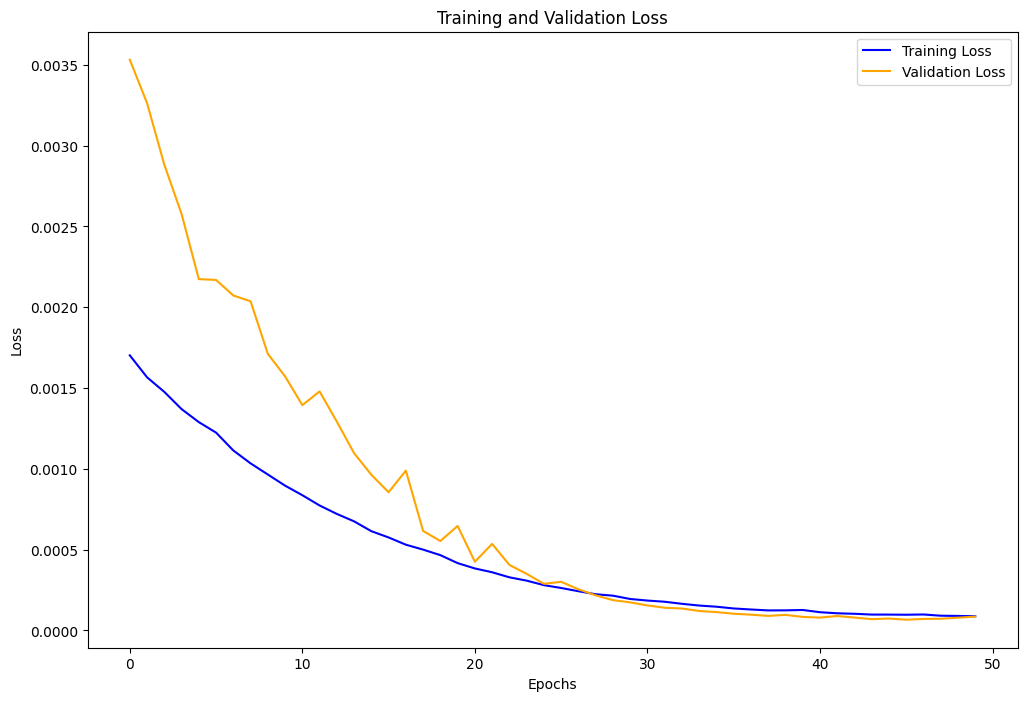

In [40]:
# Huấn luyện mô hình, sử dụng tập validation
history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Lấy dữ liệu loss từ lịch sử huấn luyện
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Tạo một chuỗi epochs để vẽ trên trục x
epochs = range(len(training_loss))

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [28]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_mae = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"Độ lỗi trên tập kiểm tra: {test_loss}")
print(f"Độ chính xác trên tập kiểm tra: {test_mae}")

# Dự đoán giá trị trên tập kiểm tra
predictions = cnn_model.predict(X_test)

# Tính toán Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")



Độ lỗi trên tập kiểm tra: 0.002413274021819234
Độ chính xác trên tập kiểm tra: 0.038390371948480606
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Absolute Error: 0.03839036728147225


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


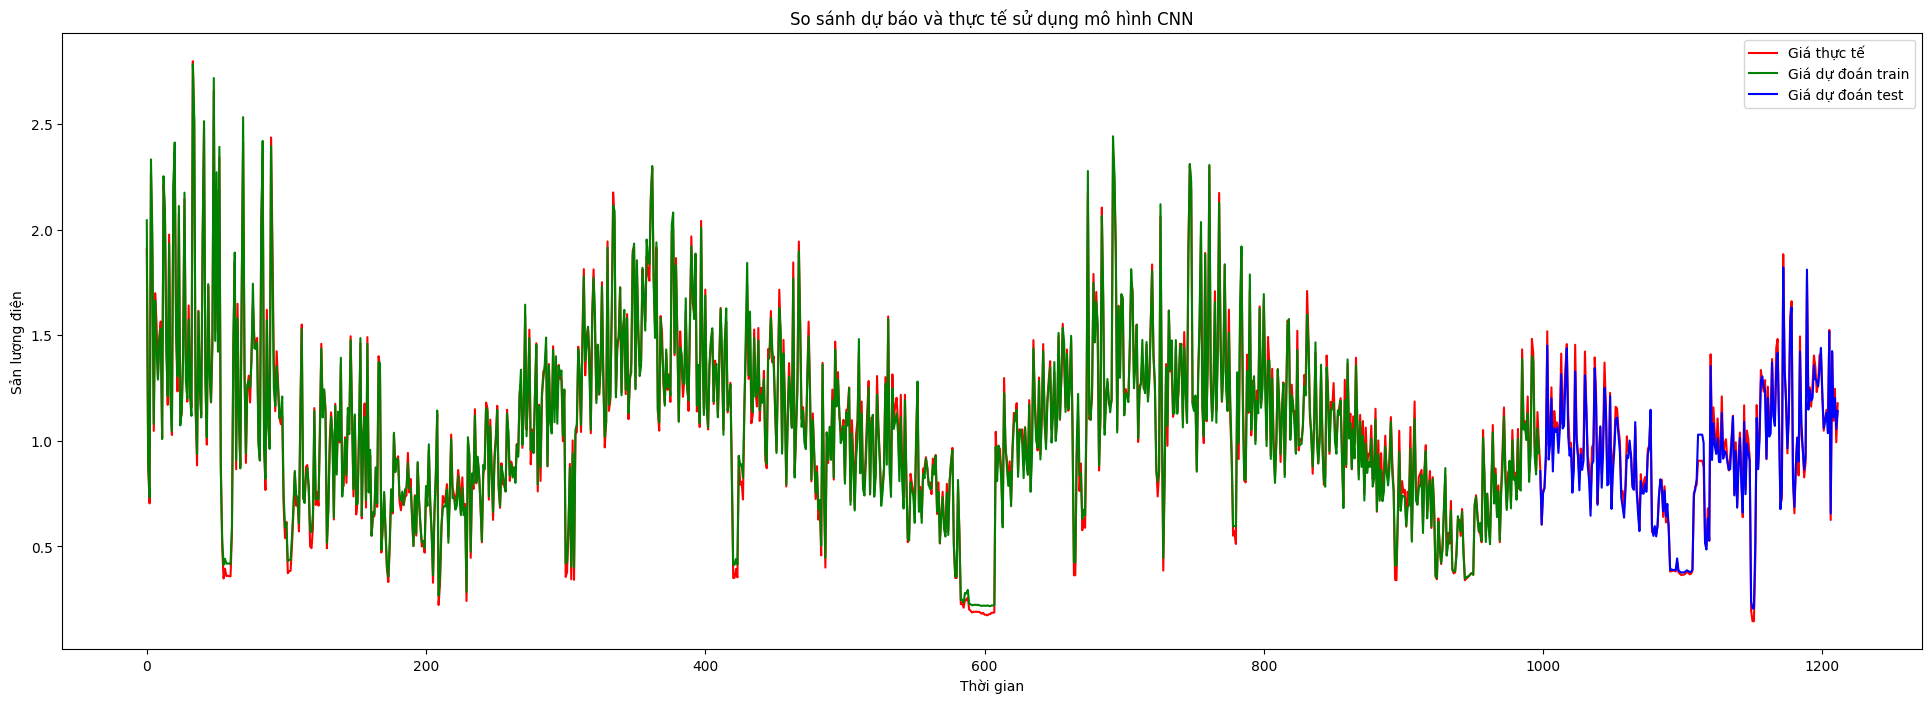

In [30]:
import matplotlib.pyplot as plt

# Dự đoán giá trị trên tập huấn luyện và kiểm tra
cnn_train_pred = cnn_model.predict(X_train).flatten()
cnn_test_pred = cnn_model.predict(X_test).flatten()

plt.figure(figsize=(24,8))

# Vẽ giá trị thực tế
plt.plot(np.concatenate([y_train, y_test]), label='Giá thực tế', color='red')

# Vẽ kết quả dự đoán từ mô hình CNN trên tập huấn luyện
plt.plot(range(len(y_train)), cnn_train_pred, label='Giá dự đoán train', color='green')

# Vẽ kết quả dự đoán từ mô hình CNN trên tập kiểm tra
plt.plot(range(len(y_train), len(y_train) + len(y_test)), cnn_test_pred, label='Giá dự đoán test', color='blue')

plt.title('So sánh dự báo và thực tế sử dụng mô hình CNN') # Đặt tên biểu đồ
plt.xlabel('Thời gian') # Đặt tên hàm x
plt.ylabel('Sản lượng điện') # Đặt tên hàm y
plt.legend() # Chú thích
plt.show()


In [31]:
from tensorflow.keras.layers import LSTM

# Khởi tạo mô hình
modelCNNLSTM = Sequential()

# Thêm lớp đầu vào
modelCNNLSTM.add(InputLayer((1, num_features)))

# Thêm lớp Conv1D
modelCNNLSTM.add(Conv1D(64, kernel_size=1, activation='relu'))

# Thêm lớp LSTM
modelCNNLSTM.add(LSTM(32))

# Thêm lớp Dense cuối cùng
modelCNNLSTM.add(Dense(1))

# Biên dịch mô hình
modelCNNLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

# Huấn luyện mô hình, sử dụng tập validation
modelCNNLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.8259 - mean_absolute_error: 1.2556 - val_loss: 1.0745 - val_mean_absolute_error: 0.9917
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7053 - mean_absolute_error: 0.7333 - val_loss: 0.2720 - val_mean_absolute_error: 0.4338
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2388 - mean_absolute_error: 0.3723 - val_loss: 0.1338 - val_mean_absolute_error: 0.2845
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1382 - mean_absolute_error: 0.2743 - val_loss: 0.1350 - val_mean_absolute_error: 0.2931
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1308 - mean_absolute_error: 0.2564 - val_loss: 0.1197 - val_mean_absolute_error: 0.2655
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1395 - mean_absolute_error: 0.2623 - val_loss: 0.1169 - val_mean_absolute_error: 0.2618
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1264 - mean_absolute_error: 0.2496 - val_loss: 0.10

In [38]:
modelCNNLSTM.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1, 64)          │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,885 (151.90 KB)

 Trainable params: 12,961 (50.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,924 (101.27 KB)

In [32]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_mae = modelCNNLSTM.evaluate(X_test, y_test, verbose=0)

print(f"Độ lỗi trên tập kiểm tra: {test_loss}")
print(f"Độ chính xác trên tập kiểm tra: {test_mae}")

# Dự đoán giá trị trên tập kiểm tra
predictions = modelCNNLSTM.predict(X_test)

# Tính toán Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")



Độ lỗi trên tập kiểm tra: 0.0008713346323929727
Độ chính xác trên tập kiểm tra: 0.022662052884697914
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Mean Absolute Error: 0.022662055393565795


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


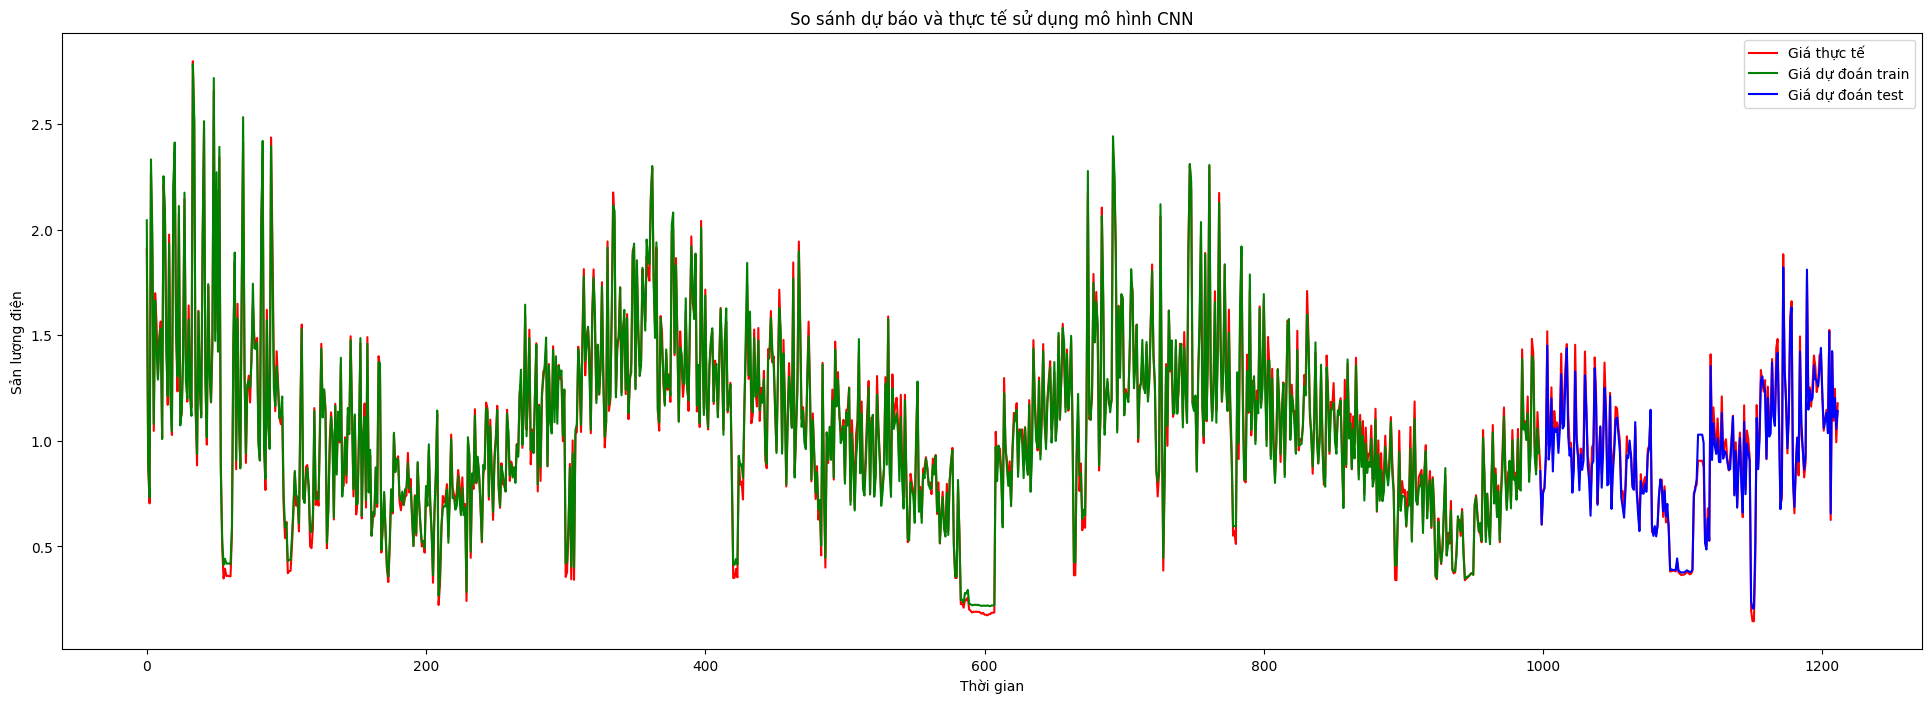

In [34]:
import matplotlib.pyplot as plt

# Dự đoán giá trị trên tập huấn luyện và kiểm tra
modelCNNLSTM_pred = modelCNNLSTM.predict(X_train).flatten()
modelCNNLSTM_pred = modelCNNLSTM.predict(X_test).flatten()

plt.figure(figsize=(24,8))

# Vẽ giá trị thực tế
plt.plot(np.concatenate([y_train, y_test]), label='Giá thực tế', color='red')

# Vẽ kết quả dự đoán từ mô hình CNN trên tập huấn luyện
plt.plot(range(len(y_train)), cnn_train_pred, label='Giá dự đoán train', color='green')

# Vẽ kết quả dự đoán từ mô hình CNN trên tập kiểm tra
plt.plot(range(len(y_train), len(y_train) + len(y_test)), cnn_test_pred, label='Giá dự đoán test', color='blue')

plt.title('So sánh dự báo và thực tế sử dụng mô hình CNN + LSTM') # Đặt tên biểu đồ
plt.xlabel('Thời gian') # Đặt tên hàm x
plt.ylabel('Sản lượng điện') # Đặt tên hàm y
plt.legend() # Chú thích
plt.show()


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0299 - val_loss: 0.0017 - val_mean_absolute_error: 0.0287
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0309 - val_loss: 0.0018 - val_mean_absolute_error: 0.0293
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0291 - val_loss: 0.0018 - val_mean_absolute_error: 0.0302
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - mean_absolute_error: 0.0275 - val_loss: 0.0015 - val_mean_absolute_error: 0.0270
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0277 - val_loss: 0.0016 - val_mean_absolute_error: 0.0291
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0276 - val_loss: 0.0018 - val_mean_absolute_error: 0.0324
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0278 - val_loss: 0.001

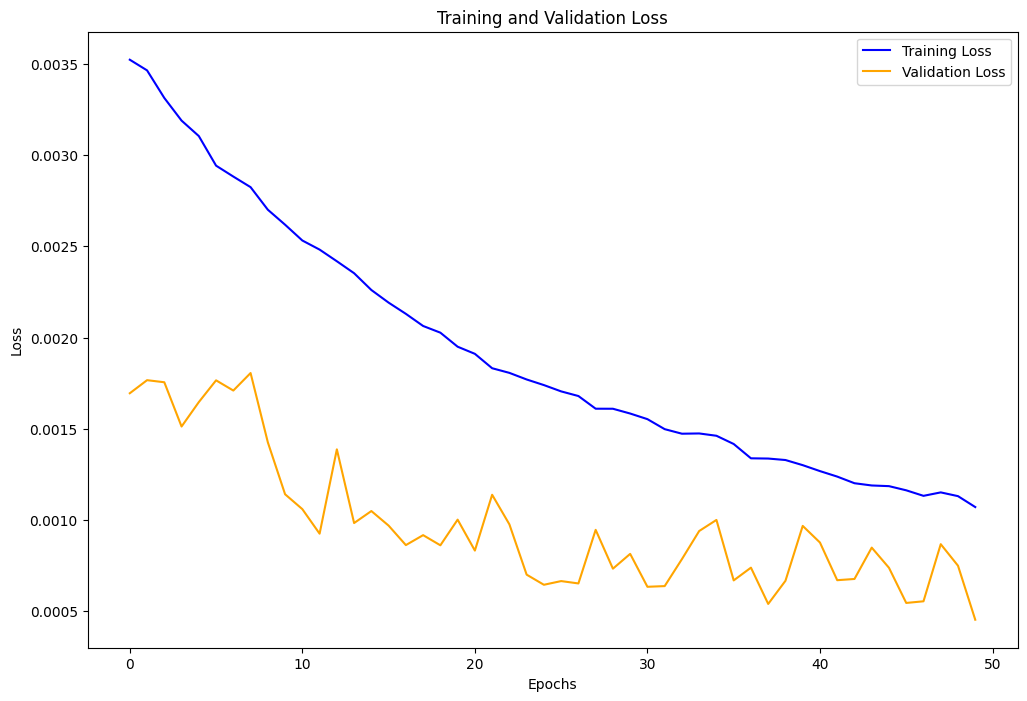

In [39]:
# Huấn luyện mô hình, sử dụng tập validation
history = modelCNNLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Lấy dữ liệu loss từ lịch sử huấn luyện
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Tạo một chuỗi epochs để vẽ trên trục x
epochs = range(len(training_loss))

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính toán các độ đo cho mỗi mô hình
models = [cnn_model, modelCNNLSTM]
model_names = ['CNN', 'CNN+LSTM']
metrics = []

for model in models:
    predictions = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    metrics.append([mae, mse, rmse, r2])

# Tạo DataFrame để hiển thị kết quả
df_metrics = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=model_names)
print(df_metrics)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
               MAE       MSE      RMSE        R2
CNN       0.038390  0.002413  0.049125  0.975334
CNN+LSTM  0.022662  0.000871  0.029518  0.991094
